In [ ]:
!pip install datasets
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.1 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/en-AU/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


In [ ]:
from transformers import pipeline

classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14",
)

In [ ]:
example = minds[0]
classifier(example["audio"]["array"])

[{'score': 0.962530791759491, 'label': 'pay_bill'},
 {'score': 0.028672993183135986, 'label': 'freeze'},
 {'score': 0.0033498124685138464, 'label': 'card_issues'},
 {'score': 0.0020058127120137215, 'label': 'abroad'},
 {'score': 0.0008484353311359882, 'label': 'high_value_payment'}]

In [ ]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [ ]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
example = minds[0]
asr(example["audio"]["array"])

'I would like to pay my electricity bill using my card can you please assist'

In [ ]:
example["english_transcription"]

'I would like to pay my electricity bill using my card can you please assist'

In [ ]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="de-DE", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/de-DE/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


In [ ]:
example = minds[0]
example["transcription"]

'ich möchte gerne Geld auf mein Konto einzahlen'

In [ ]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="maxidl/wav2vec2-large-xlsr-german")
asr(example["audio"]["array"])

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'text': 'ich möchte gerne geld auf mein konto einzallen'}

Hands-on Exercise

In [ ]:
!pip install datasets[audio] librosa transformers

In [ ]:
# Load the dataset in streaming mode

from datasets import load_dataset

ds = load_dataset("facebook/voxpopuli", name="en", streaming=True)

In [ ]:
# Take the first three examples from the training part

ds_head = ds['train'].take(3)

In [ ]:
# Get the third example and explore it

example = list(ds_head)[-1]
example

{'audio_id': '20180314-0900-PLENARY-13-en_20180314-16:03:18_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180314-0900-PLENARY-13-en_20180314-16:03:18_3.wav',
  'array': array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
          0.00198364,  0.0012207 ]),
  'sampling_rate': 16000},
 'raw_text': 'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,',
 'normalized_text': 'in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration',
 'gender': 'female',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

In [ ]:
# Listen to the example's audio

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)

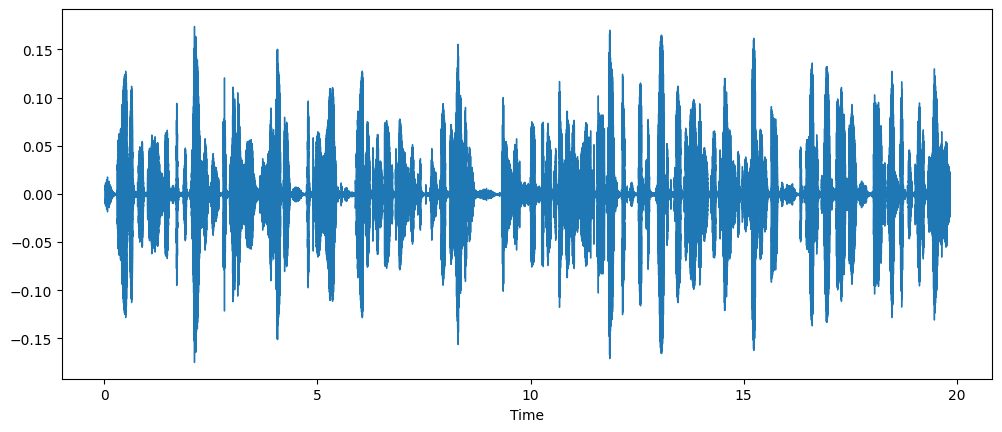

In [ ]:
# Waveform

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

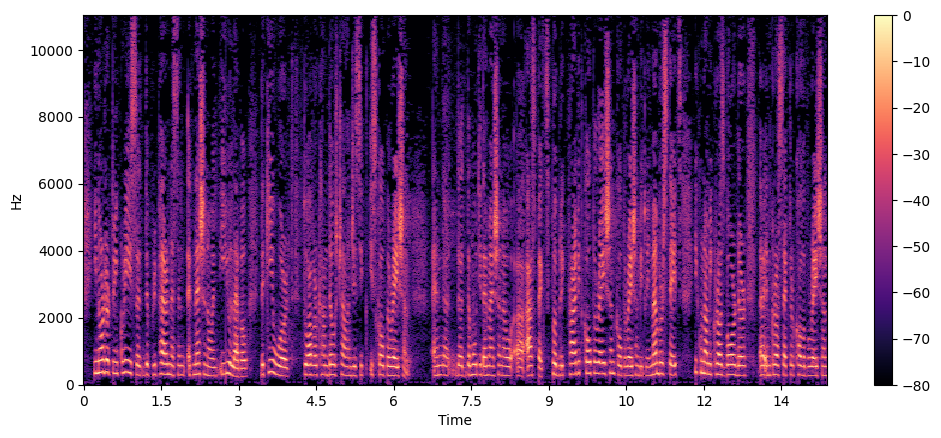

In [ ]:
# Spectrogram

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [ ]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-german")

In [ ]:
# Compare the results

print(asr(example["audio"]["array"]))
print(example["raw_text"])

{'text': 'd incrs dpl dr c  msts d'}
In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,
